# Predavanje 3
## Pandas

### Dohvaćanje podataka

Na https://www.hnb.hr/temeljne-funkcije/monetarna-politika/tecajna-lista/tecajna-lista kliknuti Pretraživanje, i odabrati:
* Mjesečni prosjeci
* Sve godine
* Svi mjeseci
* Sve (valute)
* Svi tečajevi
* JSON

te kliknuti "Preuzimanje". Datoteku snimiti u tekući direktorij kao `ProsjeciMjesecni_2011-2018.json`.

[CP65001](https://docs.python.org/3.5/library/codecs.html?highlight=cp65001#standard-encodings) je Microsoftova implementacija UTF8. Nažalost ne postoji pod Linuxom, ali nam ni ne treba: automatska detekcija ovdje sasvim lijepo funkcionira.

In [37]:
{metoda for metoda in dir(pd) if metoda.startswith('read_')}

{'read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table'}

In [38]:
import pandas as pd
tečaj = pd.read_json('ProsjeciMjesecni_2011-2018.json')
tečaj.columns

Index(['Država', 'Godina', 'Jedinica', 'Kupovni za devize', 'Mjesec',
       'Prodajni za devize', 'Srednji za devize', 'Valuta', 'Šifra valute'],
      dtype='object')

Vidimo listu stupaca. Mnoge od njih mogli bismo ljepše prikazati. Za početak pogledajmo stupac 'Mjesec'.

### Sređivanje datumâ

In [39]:
tečaj['Mjesec']

0       Siječanj
1       Siječanj
2       Siječanj
3       Siječanj
4       Siječanj
5       Siječanj
6       Siječanj
7       Siječanj
8       Siječanj
9       Siječanj
10      Siječanj
11      Siječanj
12      Siječanj
13      Siječanj
14       Veljača
15       Veljača
16       Veljača
17       Veljača
18       Veljača
19       Veljača
20       Veljača
21       Veljača
22       Veljača
23       Veljača
24       Veljača
25       Veljača
26       Veljača
27       Veljača
28        Ožujak
29        Ožujak
          ...   
1177    Siječanj
1178    Siječanj
1179    Siječanj
1180    Siječanj
1181    Siječanj
1182    Siječanj
1183    Siječanj
1184    Siječanj
1185    Siječanj
1186    Siječanj
1187    Siječanj
1188    Siječanj
1189    Siječanj
1190    Siječanj
1191    Siječanj
1192     Veljača
1193     Veljača
1194     Veljača
1195     Veljača
1196     Veljača
1197     Veljača
1198     Veljača
1199     Veljača
1200     Veljača
1201     Veljača
1202     Veljača
1203     Veljača
1204     Velja

In [40]:
hr_mjeseci = set(tečaj['Mjesec'])
hr_mjeseci

{'Kolovoz',
 'Lipanj',
 'Listopad',
 'Ožujak',
 'Prosinac',
 'Rujan',
 'Siječanj',
 'Srpanj',
 'Studeni',
 'Svibanj',
 'Travanj',
 'Veljača'}

Dakle, imamo hrvatske nazive mjeseci. Ako bismo željeli to pretvoriti u datume, trebat će nam broj mjeseca. Python [zna](http://strftime.org/) hrvatske nazive za mjesece, samo trebamo prethodno [locale](https://en.wikipedia.org/wiki/Locale_(computer_software%29) podesiti na hrvatski. Nakon toga izgradimo rječnik koji preslikava nazive mjeseci u njihove redne brojeve.

In [41]:
#import locale, time
#locale.setlocale(locale.LC_ALL, 'hr')
#mjesec_broj = {hr_mjesec: time.strptime(hr_mjesec, '%B').tm_mon for hr_mjesec in hr_mjeseci}

Nažalost, ovo gore ne radi na računalima u Pr1 jer su iz tko zna kojeg razloga podešena na američki locale (osim za vrstu papira, što nam ne pomaže ovdje:). Konstruirajmo ručno naš rječnik:

In [42]:
mjesec_broj = {
 'Kolovoz': 8,
 'Lipanj': 6,
 'Listopad': 10,
 'Ožujak': 3,
 'Prosinac': 12,
 'Rujan': 9,
 'Siječanj': 1,
 'Srpanj': 7,
 'Studeni': 11,
 'Svibanj': 5,
 'Travanj': 4,
 'Veljača': 2,
}

Sada možemo zamijeniti sve vrijednosti u stupcu 'Mjesec' koristeći gornji rječnik. `inplace` služi tome da se zamjena obavi na licu mjesta, unutar samog dataframea `tečaj` (umjesto vraćanja novog dataframea).

In [43]:
tečaj.replace({'Mjesec': mjesec_broj}, inplace=True)

In [44]:
tečaj.head()

Država  Godina  Jedinica Kupovni za devize  Mjesec Prodajni za devize  \
0  Australija    2011         1          5,504948       1           5,538077   
1      Kanada    2011         1          5,554872       1           5,588302   
2       Češka    2011         1          0,301385       1           0,303199   
3      Danska    2011         1          0,989672       1           0,995628   
4    Mađarska    2011       100          2,676801       1           2,692910   

  Srednji za devize Valuta  Šifra valute  
0          5,521513    AUD            36  
1          5,571587    CAD           124  
2          0,302292    CZK           203  
3          0,992650    DKK           208  
4          2,684856    HUF           348

Sada napokon možemo stvoriti stupac 'Datum' (za dan u mjesecu fiksiramo `1`), te obrisati posebne stupce za godinu i mjesec koji nam više ne trebaju.

In [45]:
tečaj['Datum'] = pd.to_datetime(dict(year=tečaj['Godina'], month=tečaj['Mjesec'], day=1))
del tečaj['Godina'], tečaj['Mjesec']
tečaj.head()

Država  Jedinica Kupovni za devize Prodajni za devize  \
0  Australija         1          5,504948           5,538077   
1      Kanada         1          5,554872           5,588302   
2       Češka         1          0,301385           0,303199   
3      Danska         1          0,989672           0,995628   
4    Mađarska       100          2,676801           2,692910   

  Srednji za devize Valuta  Šifra valute      Datum  
0          5,521513    AUD            36 2011-01-01  
1          5,571587    CAD           124 2011-01-01  
2          0,302292    CZK           203 2011-01-01  
3          0,992650    DKK           208 2011-01-01  
4          2,684856    HUF           348 2011-01-01

Umjesto beskorisnih rednih brojeva, stavimo datum kao indeks kojim možemo dohvaćati podatke.

In [46]:
tečaj.set_index('Datum', inplace=True)

In [47]:
tečaj.head()

Država  Jedinica Kupovni za devize Prodajni za devize  \
Datum                                                                   
2011-01-01  Australija         1          5,504948           5,538077   
2011-01-01      Kanada         1          5,554872           5,588302   
2011-01-01       Češka         1          0,301385           0,303199   
2011-01-01      Danska         1          0,989672           0,995628   
2011-01-01    Mađarska       100          2,676801           2,692910   

           Srednji za devize Valuta  Šifra valute  
Datum                                              
2011-01-01          5,521513    AUD            36  
2011-01-01          5,571587    CAD           124  
2011-01-01          0,302292    CZK           203  
2011-01-01          0,992650    DKK           208  
2011-01-01          2,684856    HUF           348

### Države, valute i šifre

Sada se bacimo na stupce koji se odnose na valutu. Pretpostavljamo da postoji bijekcija (trijekcija?:) između sljedeća 3 stupca:

In [48]:
tečaj[['Država', 'Valuta', 'Šifra valute']].drop_duplicates()

Država Valuta  Šifra valute
Datum                                               
2011-01-01           Australija    AUD            36
2011-01-01               Kanada    CAD           124
2011-01-01                Češka    CZK           203
2011-01-01               Danska    DKK           208
2011-01-01             Mađarska    HUF           348
2011-01-01                Japan    JPY           392
2011-01-01             Norveška    NOK           578
2011-01-01              Švedska    SEK           752
2011-01-01            Švicarska    CHF           756
2011-01-01     Velika Britanija    GBP           826
2011-01-01                  SAD    USD           840
2011-01-01                         XDR           960
2011-01-01                  EMU    EUR           978
2011-01-01              Poljska    PLN           985
2017-12-01  Bosna i Hercegovina    BAM           977

Čini se da je doista tako (u pojedinim stupcima nema duplikata --- što ovdje možemo ustanoviti golim okom, ali kod kompliciranijih podataka, dobro je koristiti `.duplicated` metodu), jedino što [XDR](https://hr.wikipedia.org/wiki/Posebna_prava_vu%C4%8Denja) nema napisanu državu. Kako euro ima EMU, čini se logičnim XDRu staviti MMF. Šifra valute nam svakako više ne treba, jer je u bijekciji s valutom, a nema neku pametnu semantiku ionako.

In [49]:
tečaj.loc[tečaj['Valuta'] == 'XDR', 'Država'] = 'MMF'
del tečaj['Šifra valute']
tečaj[['Država', 'Valuta']].drop_duplicates()

Država Valuta
Datum                                 
2011-01-01           Australija    AUD
2011-01-01               Kanada    CAD
2011-01-01                Češka    CZK
2011-01-01               Danska    DKK
2011-01-01             Mađarska    HUF
2011-01-01                Japan    JPY
2011-01-01             Norveška    NOK
2011-01-01              Švedska    SEK
2011-01-01            Švicarska    CHF
2011-01-01     Velika Britanija    GBP
2011-01-01                  SAD    USD
2011-01-01                  MMF    XDR
2011-01-01                  EMU    EUR
2011-01-01              Poljska    PLN
2017-12-01  Bosna i Hercegovina    BAM

Državu zasad ostavimo, ljepše izgleda od troslovne skraćenice valute za kasniju vizualizaciju.

In [50]:
tečaj.dtypes

Država                object
Jedinica               int64
Kupovni za devize     object
Prodajni za devize    object
Srednji za devize     object
Valuta                object
dtype: object

### Tečajevi kao brojevi

Nego, pogledajmo tri stupca sa samim tečajevima. Prvo, maknimo podstring ` za devize` s kraja njihovih naziva. Drugo, pretvorimo ih u brojeve --- samo prethodno moramo decimalni zarez zamijeniti decimalnom točkom (teoretski, o tome bi `locale` trebao voditi računa, ali očito ne funkcionira baš najbolje --- možda jer se ni sami Hrvati ne mogu dogovoriti čime se odvajaju decimale:). I treće, pretvorimo ove retke što imaju `100` u stupcu `Jedinica`, u retke sa 100 puta manjim tečajevima.

In [51]:
tečaj['Jedinica'].drop_duplicates()

Datum
2011-01-01      1
2011-01-01    100
Name: Jedinica, dtype: int64

In [52]:
tečaj.rename(columns=lambda x: x[:-len(' za devize')] 
                               if x.endswith(' za devize') else x,
             inplace=True)

for vrsta in 'Kupovni', 'Prodajni', 'Srednji':
    tečaj[vrsta] = pd.to_numeric(tečaj[vrsta].str.replace(',', '.'))
    tečaj[vrsta] /= tečaj['Jedinica']

del tečaj['Jedinica']
tečaj.head()

Država   Kupovni  Prodajni   Srednji Valuta
Datum                                                      
2011-01-01  Australija  5.504948  5.538077  5.521513    AUD
2011-01-01      Kanada  5.554872  5.588302  5.571587    CAD
2011-01-01       Češka  0.301385  0.303199  0.302292    CZK
2011-01-01      Danska  0.989672  0.995628  0.992650    DKK
2011-01-01    Mađarska  0.026768  0.026929  0.026849    HUF

### Srednji tečaj je dovoljan

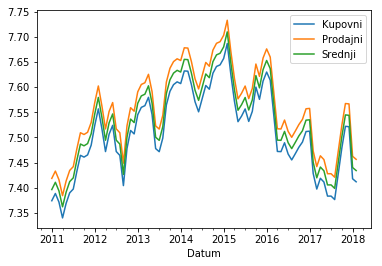

In [53]:
%matplotlib inline
tečaj[tečaj['Valuta'] == 'EUR'].plot()

Iz grafa zaključujemo da su kupovni, srednji i prodajni tečajevi vrlo slični, te nam vjerojatno ne trebaju sva tri podatka (iz bilo kojeg možemo zaključiti ostala dva). Kako XDR nema kupovni i prodajni tečaj, želimo srednji tečaj proglasiti osnovnim, a kupovni i prodajni računati iz njega.

In [60]:
tečaj[tečaj['Valuta'] == 'XDR'].head()

Država  Kupovni  Prodajni   Srednji Valuta
Datum                                                
2011-01-01    MMF      NaN       NaN  8.575765    XDR
2011-02-01    MMF      NaN       NaN  8.486219    XDR
2011-03-01    MMF      NaN       NaN  8.351255    XDR
2011-04-01    MMF      NaN       NaN  8.158269    XDR
2011-05-01    MMF      NaN       NaN  8.214160    XDR

Prva, relativno očita, hipoteza je da "srednji" tečaj doista znači sredinu, konkretno aritmetičku sredinu.

In [61]:
(tečaj[['Kupovni', 'Prodajni']].mean(axis=1) - tečaj['Srednji']).abs().max()

5.00000002290335e-07

Odstupanje od $5\cdot10^{-7}$ je očito samo posljedica zaokruživanja (jer su tečajevi zaokruženi na 6 decimala).

Ipak, to nije dovoljno da rekonstruiramo i kupovni i prodajni tečaj iz srednjeg --- moramo ustanoviti kolika je razlika. Apsolutna razlika vjerojatno nema smisla, između ostalog jer su neki tečajevi bili dijeljeni sa 100. Pogledajmo relativnu razliku, odnosno omjer.

In [62]:
pd.DataFrame({vrsta: tečaj[vrsta] / tečaj['Srednji'] for vrsta in ['Kupovni', 'Prodajni']}).describe()

Kupovni      Prodajni
count  1.121000e+03  1.121000e+03
mean   9.970000e-01  1.003000e+00
std    4.673557e-07  4.681532e-07
min    9.969968e-01  1.002997e+00
25%    9.969999e-01  1.003000e+00
50%    9.970000e-01  1.003000e+00
75%    9.970001e-01  1.003000e+00
max    9.970032e-01  1.003002e+00

std (standardna devijacija) od $<5\cdot10^{-7}$ pokazuje da su stupci zapravo konstantni. Vidimo da je razlika 0.3% u svakom smjeru: kupovni je 0.3% manji, a prodajni 0.3% veći od srednjeg. Iz toga slijedi da ih lako možemo rekonstruirati, te ih ne moramo pamtiti kao zasebne stupce u tablici.

In [63]:
del tečaj['Prodajni'], tečaj['Kupovni']

In [64]:
tečaj.head()

Država   Srednji Valuta
Datum                                  
2011-01-01  Australija  5.521513    AUD
2011-01-01      Kanada  5.571587    CAD
2011-01-01       Češka  0.302292    CZK
2011-01-01      Danska  0.992650    DKK
2011-01-01    Mađarska  0.026849    HUF

### Grafovi

Pogledajmo primjer grafičkog prikaza: kretanje tečaja švicarskog franka kroz praćeno razdoblje. Jasno se vidi ogromni skok početkom 2015. godine.

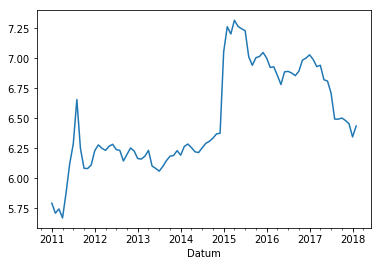

In [66]:
tečaj.loc[tečaj['Valuta'] == 'CHF', 'Srednji'].plot()

Možemo napraviti i grafove za svaku pojedinu valutu:

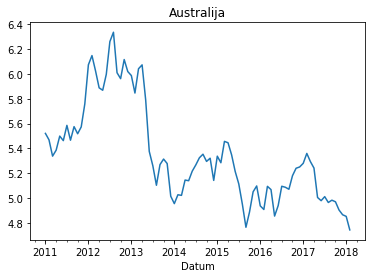

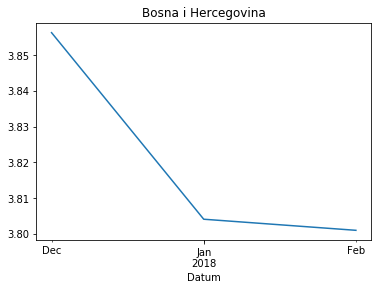

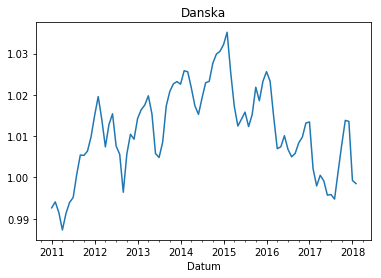

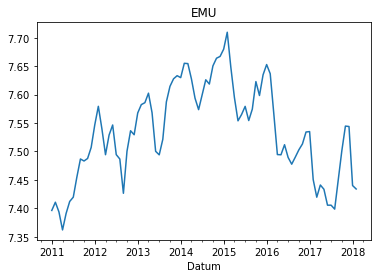

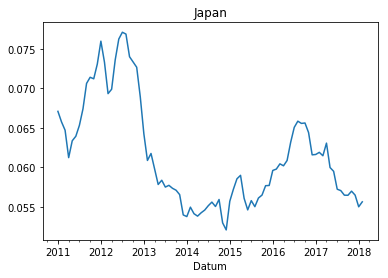

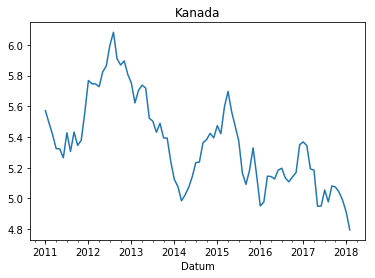

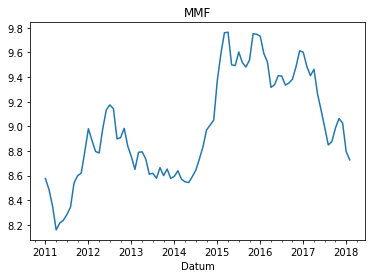

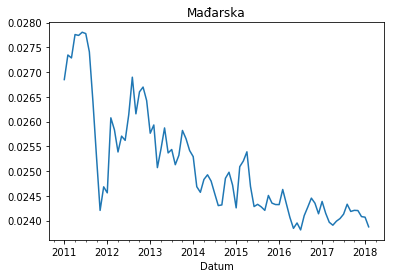

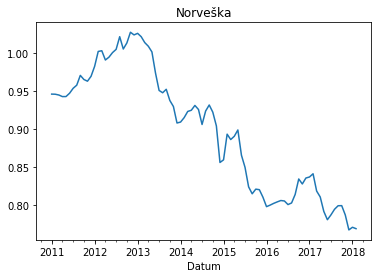

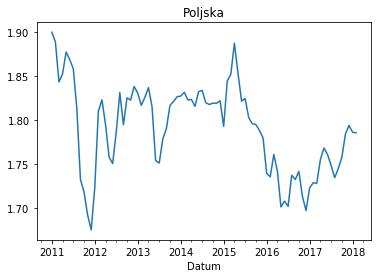

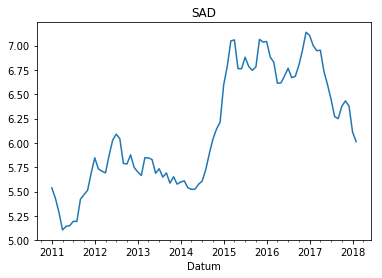

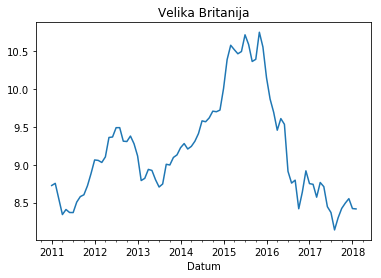

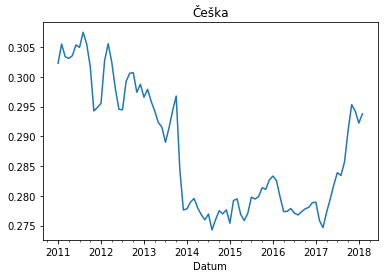

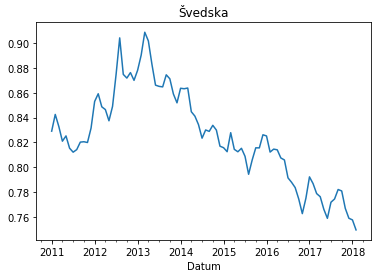

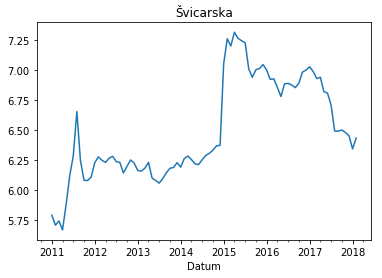

In [67]:
for država, podokvir in tečaj.groupby('Država'):
    podokvir.plot(title=država, legend=None)

### Odnos dviju stranih valuta

Da bismo pratili relativni tečaj dviju valuta od kojih nijedna nije kuna, potrebno je različite valute dobiti kao stupce. Jednostavan način da se to učini je staviti valutu u indeks (maknut ćemo državu da nam ne smeta), i onda pozvati `unstack` metodu.

In [68]:
tečaj.set_index([tečaj.index, 'Valuta'], inplace=True)
del tečaj['Država']
tečaj.head(20)

Srednji
Datum      Valuta          
2011-01-01 AUD     5.521513
           CAD     5.571587
           CZK     0.302292
           DKK     0.992650
           HUF     0.026849
           JPY     0.067089
           NOK     0.945634
           SEK     0.829051
           CHF     5.794304
           GBP     8.724773
           USD     5.537878
           XDR     8.575765
           EUR     7.396420
           PLN     1.900072
2011-02-01 AUD     5.469563
           CAD     5.492327
           CZK     0.305517
           DKK     0.994092
           HUF     0.027346
           JPY     0.065763

In [69]:
tečaj.unstack('Valuta')

Srednji                                                    \
Valuta           AUD       BAM       CAD       CHF       CZK       DKK   
Datum                                                                    
2011-01-01  5.521513       NaN  5.571587  5.794304  0.302292  0.992650   
2011-02-01  5.469563       NaN  5.492327  5.710786  0.305517  0.994092   
2011-03-01  5.338322       NaN  5.415269  5.746383  0.303387  0.991520   
2011-04-01  5.386425       NaN  5.324651  5.671406  0.303116  0.987303   
2011-05-01  5.499733       NaN  5.323025  5.882541  0.303557  0.991288   
2011-06-01  5.463301       NaN  5.265003  6.121611  0.305374  0.993951   
2011-07-01  5.586135       NaN  5.427585  6.288996  0.304951  0.995140   
2011-08-01  5.466704       NaN  5.305947  6.657745  0.307502  1.000725   
2011-09-01  5.575827       NaN  5.432720  6.250744  0.305516  1.005435   
2011-10-01  5.518712       NaN  5.345578  6.085039  0.301705  1.005341   
2011-11-01  5.573647       NaN  5.378559  6.082743  0.294278  1.006383   
2011-12-01  5.758831       NaN  5.559832  6.112429  0.294873  1.009852   
2012-01-01  6.073910       NaN  5.768345  6.231979  0.295560  1.015017   
2012-02-01  6.148260       NaN  5.747129  6.279834  0.302710  1.019586   
2012-03-01  6.024449       NaN  5.746059  6.251841  0.305572  1.014048   
2012-04-01  5.888507       NaN  5.728512  6.234184  0.302470  1.007404   
2012-05-01  5.868946       NaN  5.824643  6.268465  0.298041  1.012824   
2012-06-01  5.997273       NaN  5.863707  6.284864  0.294551  1.015416   
2012-07-01  6.260851       NaN  5.997593  6.241017  0.294473  1.007610   
2012-08-01  6.336171       NaN  6.082778  6.234162  0.299211  1.005625   
2012-09-01  6.010115       NaN  5.910138  6.145893  0.300599  0.996427   
2012-10-01  5.962364       NaN  5.868991  6.200713  0.300724  1.005722   
2012-11-01  6.116261       NaN  5.896474  6.254353  0.297418  1.010459   
2012-12-01  6.019501       NaN  5.808641  6.228983  0.298751  1.009275   
2013-01-01  5.987356       NaN  5.751224  6.166394  0.296583  1.014281   
2013-02-01  5.846483       NaN  5.622783  6.161676  0.297918  1.016386   
2013-03-01  6.042051       NaN  5.704623  6.185597  0.295891  1.017536   
2013-04-01  6.073394       NaN  5.738285  6.234325  0.294276  1.019776   
2013-05-01  5.790835       NaN  5.719164  6.104171  0.292351  1.015400   
2013-06-01  5.376424       NaN  5.523467  6.084023  0.291561  1.005788   
...              ...       ...       ...       ...       ...       ...   
2015-09-01  4.765329       NaN  5.091709  6.942959  0.279877  1.015223   
2015-10-01  4.888398       NaN  5.183148  7.006613  0.281373  1.021851   
2015-11-01  5.050875       NaN  5.329308  7.016779  0.281113  1.018581   
2015-12-01  5.098144       NaN  5.148764  7.049754  0.282652  1.023288   
2016-01-01  4.937558       NaN  4.951244  7.004027  0.283337  1.025618   
2016-02-01  4.908655       NaN  4.976686  6.925609  0.282561  1.023313   
2016-03-01  5.095151       NaN  5.145003  6.930301  0.279847  1.014694   
2016-04-01  5.068793       NaN  5.143247  6.858715  0.277368  1.006970   
2016-05-01  4.855564       NaN  5.126689  6.783124  0.277404  1.007427   
2016-06-01  4.939507       NaN  5.184768  6.888549  0.277882  1.010112   
2016-07-01  5.095732       NaN  5.196875  6.892748  0.277106  1.006805   
2016-08-01  5.087716       NaN  5.133501  6.878600  0.276802  1.005008   
2016-09-01  5.071550       NaN  5.108462  6.857253  0.277321  1.005821   
2016-10-01  5.180651       NaN  5.140420  6.893958  0.277822  1.008377   
2016-11-01  5.240763       NaN  5.169131  6.986309  0.278071  1.009765   
2016-12-01  5.251182       NaN  5.349959  7.003823  0.278839  1.013179   
2017-01-01  5.280477       NaN  5.368499  7.030407  0.278953  1.013439   
2017-02-01  5.360187       NaN  5.344355  6.991528  0.275864  1.002132   
2017-03-01  5.294459       NaN  5.192864  6.932323  0.274671  0.997948   
2017-04-01  5.242195       NaN  5.184009  6.943622  0.277260  1.000525   
2017-05-01  5.005

In [70]:
tečaj = tečaj.unstack('Valuta')
tečaj.head()

Srednji                                                        \
Valuta           AUD BAM       CAD       CHF       CZK       DKK       EUR   
Datum                                                                        
2011-01-01  5.521513 NaN  5.571587  5.794304  0.302292  0.992650  7.396420   
2011-02-01  5.469563 NaN  5.492327  5.710786  0.305517  0.994092  7.410873   
2011-03-01  5.338322 NaN  5.415269  5.746383  0.303387  0.991520  7.393749   
2011-04-01  5.386425 NaN  5.324651  5.671406  0.303116  0.987303  7.362212   
2011-05-01  5.499733 NaN  5.323025  5.882541  0.303557  0.991288  7.391226   

                                                                        \
Valuta           GBP       HUF       JPY       NOK       PLN       SEK   
Datum                                                                    
2011-01-01  8.724773  0.026849  0.067089  0.945634  1.900072  0.829051   
2011-02-01  8.753128  0.027346  0.065763  0.945485  1.889289  0.842513   
2011-03-01  8.546276  0.027285  0.064709  0.944455  1.843635  0.832785   
2011-04-01  8.340644  0.027759  0.061243  0.942367  1.852690  0.820994   
2011-05-01  8.407499  0.027741  0.063371  0.942421  1.877661  0.825230   

                                
Valuta           USD       XDR  
Datum                           
2011-01-01  5.537878  8.575765  
2011-02-01  5.431365  8.486219  
2011-03-01  5.285354  8.351255  
2011-04-01  5.105235  8.158269  
2011-05-01  5.142271  8.214160

Sada možemo grafički prikazati recimo kretanje tečaja €/\$.

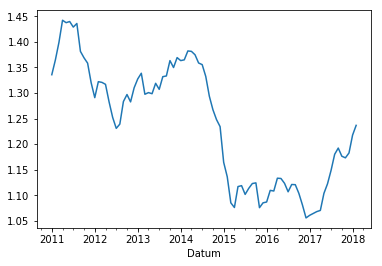

In [87]:
(tečaj['EUR'] / tečaj['USD']).plot()

## Domaća zadaća

Proučite malo podatke iz https://nyu.data-bootcamp.com/data/. Inspirirajte se za 1. zadaću.